## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import itertools
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix


In [1]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.shape

(284807, 31)

In [3]:
df.describe().round()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,...,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0
mean,94814.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,88.0,0.0
std,47488.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,250.0,0.0
min,0.0,-56.0,-73.0,-48.0,-6.0,-114.0,-26.0,-44.0,-73.0,-13.0,...,-35.0,-11.0,-45.0,-3.0,-10.0,-3.0,-23.0,-15.0,0.0,0.0
25%,54202.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,...,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.0,0.0
50%,84692.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,22.0,0.0
75%,139320.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0
max,172792.0,2.0,22.0,9.0,17.0,35.0,73.0,121.0,20.0,16.0,...,27.0,11.0,23.0,5.0,8.0,4.0,32.0,34.0,25691.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
vc = df['Class'].value_counts().to_frame()
vc['percent'] = vc['Class'].apply(lambda x : round(100*float(x) / len(df), 2))
vc = vc.rename(columns = {"index" : "Target", "Class" : "Count"})
vc

,Count,percent
0,284315,99.83
1,492,0.17


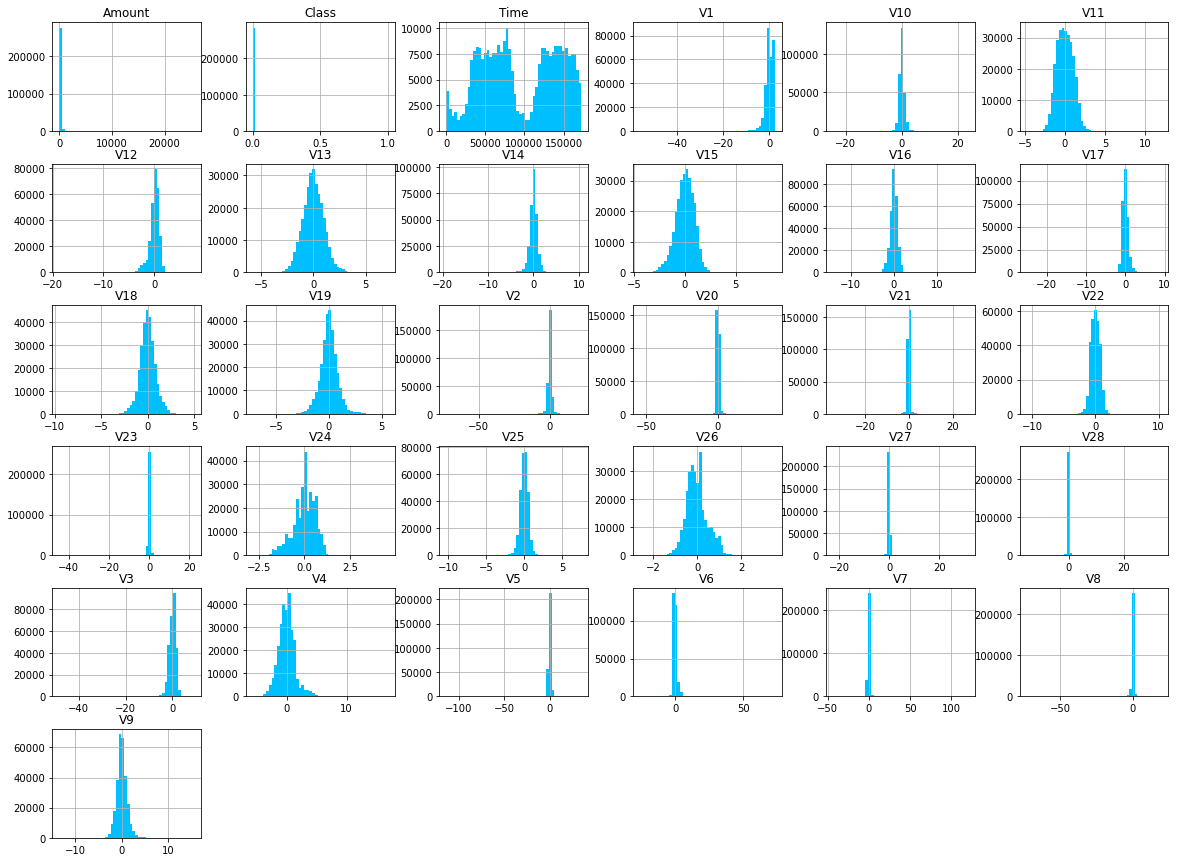

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df.hist (bins=50, figsize=(20,15), color = 'deepskyblue')
plt.show()

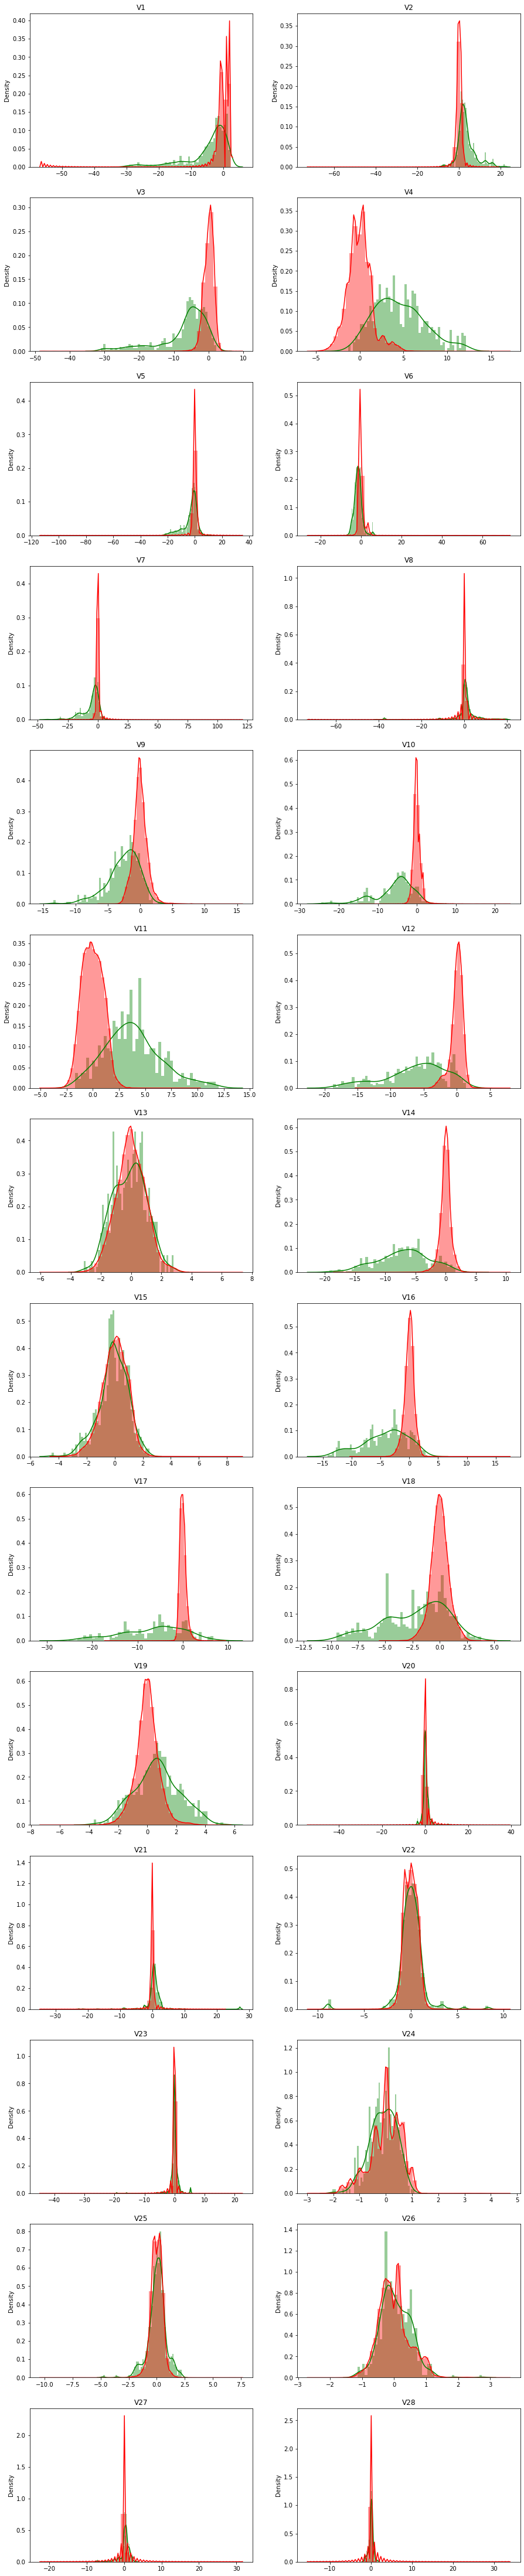

In [8]:
import seaborn as sns
columns = df.columns[1:29]

plt.figure(figsize=(15,20*4))
for n, col in enumerate(columns):

    ax = plt.subplot(14, 2, n+1)
    sns.distplot(df[col].loc[df.Class==1], bins = 50, color='g')
    sns.distplot(df[col].loc[df.Class==0], bins = 50, color='r') #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

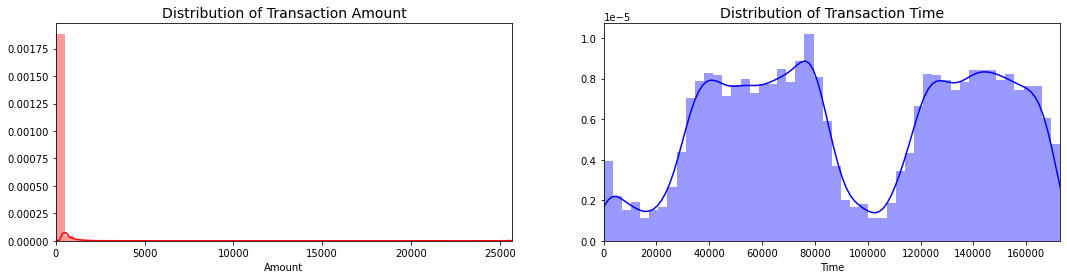

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

sns.distplot(df.Amount, color="r", ax=ax[0])
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(df.Amount), max(df.Amount)])

sns.distplot(df.Time, color="b", ax=ax[1])
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(df.Time), max(df.Time)])

plt.show()

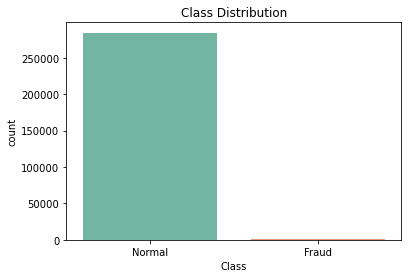

In [10]:
df1 = df.replace({'Class': 1},{'Class':'Fraud'},regex=True)
df1 = df1.replace({'Class': 0},{'Class':'Normal'},regex=True)

ax = sns.countplot(x='Class', data= df1,palette="Set2")
plt.title('Class Distribution')
plt.show()

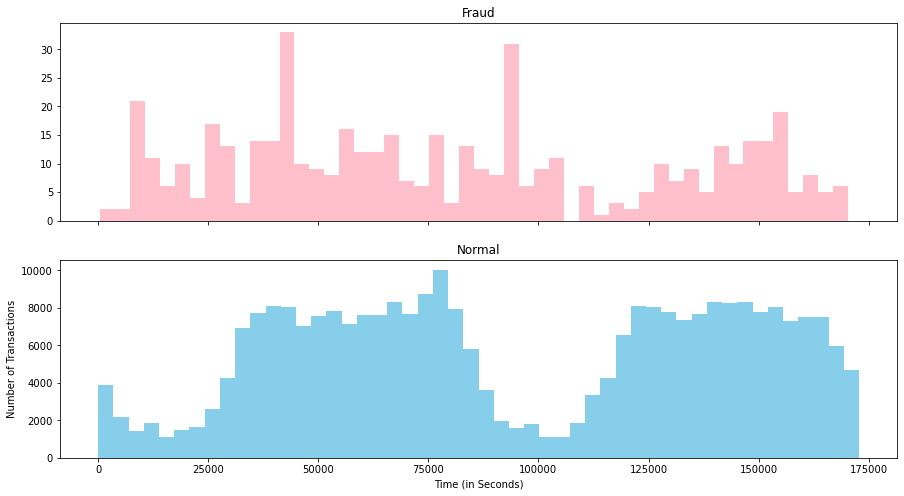

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))

ax1.hist(df.Time[df.Class == 1], bins = 50, color = 'pink')
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = 50, color = 'skyblue')
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

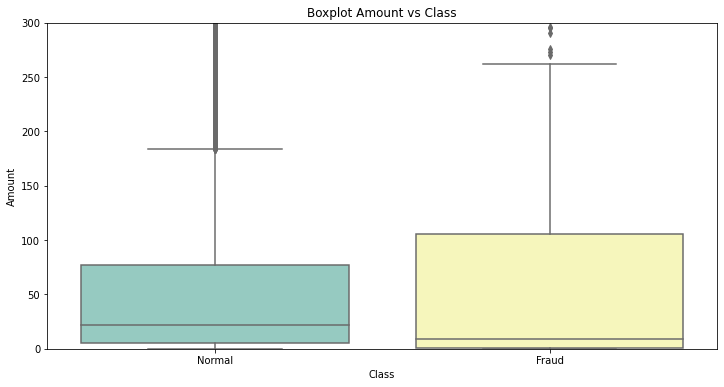

In [12]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x = 'Class', y = 'Amount', data = df1, palette = "Set3")
ax.set_ylim([0, 300])
plt.title('Boxplot Amount vs Class')
plt.show()


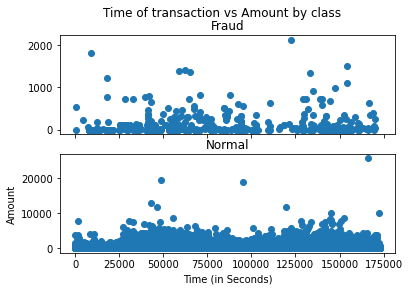

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')
ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

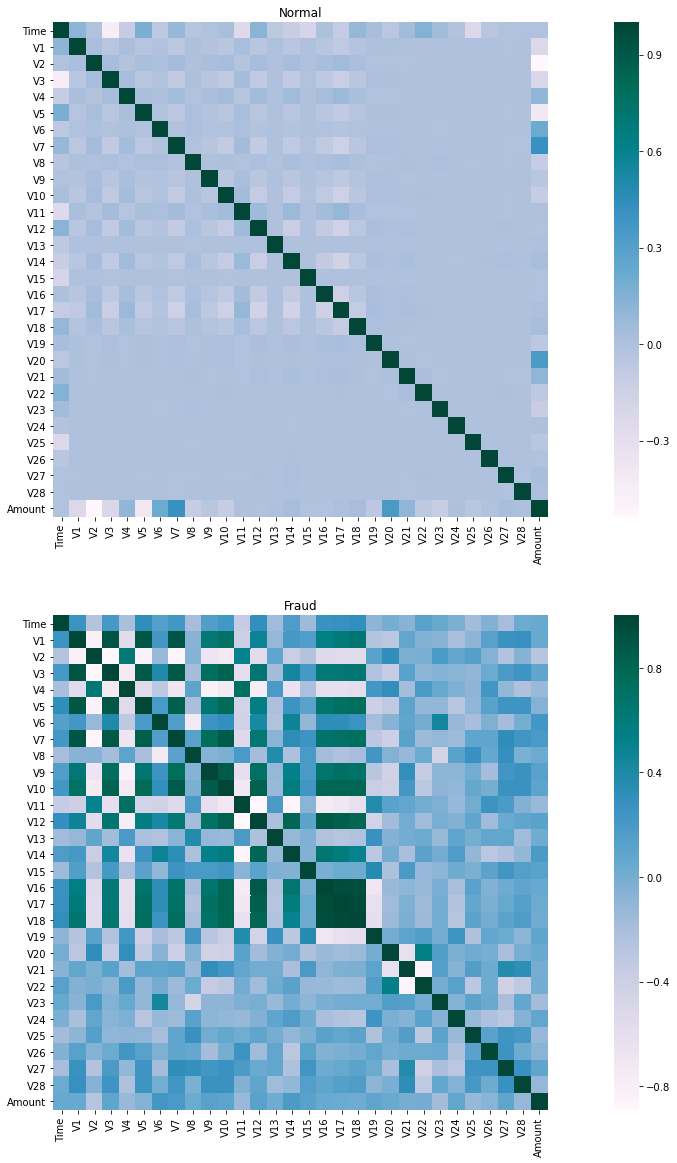

In [14]:
f, (ax1, ax2) = plt.subplots(2,1, figsize =( 24, 20))
sns.heatmap(df.loc[df.Class ==0 ].drop(['Class'],1).corr(),
            square=True, ax = ax1,annot_kws={'size':20}, cmap = 'PuBuGn')             
ax1.set_title('Normal')

sns.heatmap(df.loc[df.Class ==1 ].drop(['Class'],1).corr(),
            square=True, ax = ax2, annot_kws={'size':20}, cmap = 'PuBuGn')
ax2.set_title('Fraud')

plt.show()

In [15]:
from sklearn.model_selection import train_test_split
y = df['Class']
X = df.drop(columns=['Class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [16]:
X_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,...,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000
mean,94807.188750,0.002205,-0.002276,-0.001092,0.000978,-0.001247,-0.000505,-0.000932,-0.001840,-0.000118,...,0.000708,0.000005,0.000384,-0.000206,0.000633,0.000343,-0.000492,-0.000422,0.000079,88.543376
std,47498.445033,1.961180,1.656248,1.516510,1.417835,1.368864,1.327508,1.227154,1.209708,1.100863,...,0.769586,0.741929,0.727469,0.624459,0.605390,0.521141,0.481764,0.402268,0.323520,248.251629
min,0.000000,-46.855047,-63.344698,-33.680984,-5.683171,-42.147898,-23.496714,-43.557242,-73.216718,-13.434066,...,-23.646890,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,0.000000
25%,54145.000000,-0.920446,-0.600145,-0.893436,-0.848607,-0.692967,-0.769119,-0.554002,-0.209226,-0.644858,...,-0.211751,-0.228916,-0.543642,-0.161819,-0.354146,-0.316318,-0.327340,-0.070848,-0.052855,5.670000
50%,84675.000000,0.022116,0.063649,0.177746,-0.017696,-0.055282,-0.274804,0.039373,0.021739,-0.050070,...,-0.062809,-0.029019,0.007198,-0.010994,0.041188,0.017393,-0.052547,0.001101,0.011143,22.000000
75%,139318.000000,1.316647,0.801118,1.025658,0.745533,0.610545,0.397410,0.569286,0.326217,0.596553,...,0.132884,0.187005,0.530843,0.147418,0.439422,0.350904,0.240710,0.090480,0.077988,77.480000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.099309,23.917837,44.054461,20.007208,15.594995,...,39.420904,27.202839,10.503090,22.528412,4.022866,7.519589,3.463246,12.152401,22.620072,19656.530000


In [17]:
from sklearn.preprocessing import StandardScaler
import numpy as np
col_names = ['Amount','Time']
features = X_train[col_names]
ss = StandardScaler()
scaler = ss.fit(features.values)
features = scaler.transform(features.values)
X_train[col_names]=features

In [18]:
X_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.136050e+05,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,...,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,2.136050e+05
mean,8.209637e-17,0.002205,-0.002276,-0.001092,0.000978,-0.001247,-0.000505,-0.000932,-0.001840,-0.000118,...,0.000708,0.000005,0.000384,-0.000206,0.000633,0.000343,-0.000492,-0.000422,0.000079,8.648726e-19
std,1.000002e+00,1.961180,1.656248,1.516510,1.417835,1.368864,1.327508,1.227154,1.209708,1.100863,...,0.769586,0.741929,0.727469,0.624459,0.605390,0.521141,0.481764,0.402268,0.323520,1.000002e+00
min,-1.996011e+00,-46.855047,-63.344698,-33.680984,-5.683171,-42.147898,-23.496714,-43.557242,-73.216718,-13.434066,...,-23.646890,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,-3.566687e-01
25%,-8.560761e-01,-0.920446,-0.600145,-0.893436,-0.848607,-0.692967,-0.769119,-0.554002,-0.209226,-0.644858,...,-0.211751,-0.228916,-0.543642,-0.161819,-0.354146,-0.316318,-0.327340,-0.070848,-0.052855,-3.338289e-01
50%,-2.133167e-01,0.022116,0.063649,0.177746,-0.017696,-0.055282,-0.274804,0.039373,0.021739,-0.050070,...,-0.062809,-0.029019,0.007198,-0.010994,0.041188,0.017393,-0.052547,0.001101,0.011143,-2.680487e-01
75%,9.371026e-01,1.316647,0.801118,1.025658,0.745533,0.610545,0.397410,0.569286,0.326217,0.596553,...,0.132884,0.187005,0.530843,0.147418,0.439422,0.350904,0.240710,0.090480,0.077988,-4.456527e-02
max,1.641843e+00,2.451888,22.057729,9.382558,16.875344,34.099309,23.917837,44.054461,20.007208,15.594995,...,39.420904,27.202839,10.503090,22.528412,4.022866,7.519589,3.463246,12.152401,22.620072,7.882338e+01


In [20]:
from imblearn.over_sampling import SMOTE, ADASYN
X_train_resampled, y_train_resampled = SMOTE().fit_sample(X_train, y_train)
print(pd.Series(y_train_resampled).value_counts()) 

1    213233
0    213233
Name: Class, dtype: int64


In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix,
                            classification_report, roc_curve, precision_recall_curve


LogisticRegression(C=0.005, fit_intercept=False, random_state=100,
                   solver='liblinear')
AUC for 0.005: 0.5757602721739212
-------------------------------------------------------
LogisticRegression(C=0.1, fit_intercept=False, random_state=100,
                   solver='liblinear')
AUC for 0.1: 0.5832128152462415
-------------------------------------------------------
LogisticRegression(C=0.2, fit_intercept=False, random_state=100,
                   solver='liblinear')
AUC for 0.2: 0.5835735488590642
-------------------------------------------------------
LogisticRegression(C=0.5, fit_intercept=False, random_state=100,
                   solver='liblinear')
AUC for 0.5: 0.583774842201026
-------------------------------------------------------
LogisticRegression(C=0.8, fit_intercept=False, random_state=100,
                   solver='liblinear')
AUC for 0.8: 0.5838496384457388
-------------------------------------------------------
LogisticRegression(C=1, fit_intercept

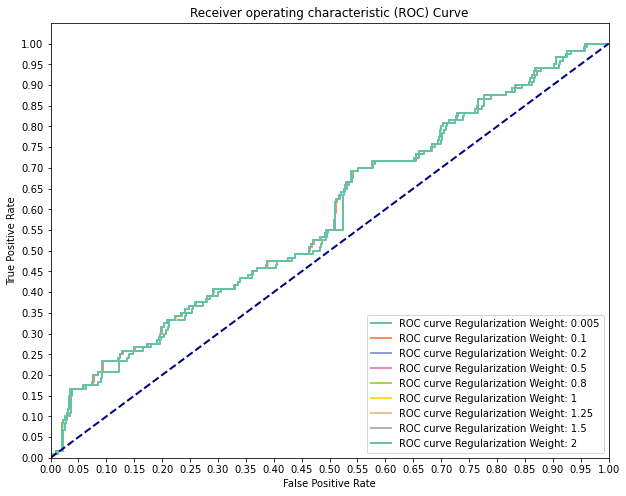

In [23]:
#LOISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

C_param_range = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
names = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
colors = sns.color_palette('Set2', n_colors=len(names))

plt.figure(figsize=(10, 8))

for n, c in enumerate(C_param_range):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear', random_state=100)
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log) # Preview model params

    # Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------')
    
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Regularization Weight: {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# DECISION TREE
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=100)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
# Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
# Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=100)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=100)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

In [ ]:
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=100)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=6,
                           max_depth=3,
                           min_samples_split=0.7,
                           min_samples_leaf=0.25,
                           random_state=100)
dt.fit(X_train, y_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
# SUPPORT VECTOR MACHINES
plt.figure(figsize=(5, 5))
plt.scatter(X_train_resampled[0], X_train_resampled[1], c=y_train_resampled, s=25);

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

# plt.figure(figsize=(5, 5))

# plt.title('Two blobs')
X, labels = make_blobs(n_features=2, centers=2, cluster_std=1.25,  random_state=123)
# plt.scatter(X[:, 0], X[:, 1], c=labels, s=25);

In [ ]:
labels